#Movimiento de proyectiles
**Ecuaciones básicas**

Considere el movimiento de un proyectil, es decir, una pelota de beisbol. Describir el movimiento de debemos calcular el vector posición $\vec{r}(t)$ y el vector velocidad $\vec{v}(t)$ del proyectile. Las ecuaciones básicas del movimiento son
\begin{eqnarray}
\frac{d\vec{v}}{dt}=\frac{1}{m}\vec{F}_a(\vec{v})-g\hat y \\
\frac{d\vec{r}}{dt}=\vec{v}
\end{eqnarray}
donde $m$ es la masa del proyectil. La fuerza debida a la resistencia del aire es $\vec{F}_a(\vec{v})$, la aceleración gravitacional es $g$, y $\hat y$ es el vector unitario en la dirección $y$.
La resistencia del aire incrementa con la velocidad del objeto, y la forma precisa de $\vec{F}_a$ depende del flujo alrededor del proyectil. Comúnmente, se aproxima a
\begin{equation}
\vec{F}_a=-\frac{1}{2}C_d\rho A\|\vec{v}\|\vec{v}
\end{equation}
donde $C_d$ es el coeficiente de arrastre, $\rho$ es la densidad del aire, y $A$ es el área de la sección transversal del proyectil. El coeficiente de arrastre es un parámetro adimensional que depende de la geometría del proyectil (entre más simple el objeto, menor es el coeficiente).
Para una esfera suave de radio $R$ moviéndose muy lentamente a través de un fluido, el coeficiente de arrastre esta dado por la Ley de Stokes
\begin{equation}
C_d=\frac{12\nu}{Rv}=\frac{24}{R_e}
\end{equation}
donde $\nu$ es la viscosidad del fluido (para el aire $\nu\approx1.5\times10^{-5}m^2/s$) y $R_e=2Rv/\nu$ es el adimensional *Número de Reynolds*. Para un objeto del tamaño de la pelota de beisbol moviéndose a través del aire, la ley de Stokes es válida solo si la velocidad es menor a $0.2mm/s(R_e\approx 1)$.

Para velocidades mayores (arriba de $20 cm/s$, $R_e>10^3$) la estela detrás de la esfera desarolla tubos de vórtice y el coeficiente de arrastre es aproximadamente constante ($C_d\approx 0.5$) para un amplio rango de velocidades. Se tomará $C_d\approx 0.35$ como un valor promedio para el rango típico de velocidaddes encontrados en beisbol.

Notar que la fuerza de arrastre, varía con el cuadrado de la magnitud de la velocidad y, por supuesto, actúa en dirección opuesta a la velocidad. Para una pelota de beisbol, las fuerzas de arrastre y gravitacional son iguales en magnitud cuando $v\approx 40 m/s$.

Se sabe como resolver las ecuaciones de movimiento si la resistencia del aire es despreciable. La trayectoria es
\begin{equation}
\vec{r}(t)=\vec{r}_1+\vec{v}_1t-\frac{1}{2}gt^2\hat y
\end{equation}
donde $\vec{r}_1\equiv \vec{r}(t=0)$ y $\vec{v}_1\equiv \vec{v}(t=0)$ son la posición y la velocidad inicial. Si el proyectil comienza en el origen y la velocidad inicial esta en un ángulo $\theta$ sobre la horizontal, entonces
\begin{eqnarray}
x_{max}=\frac{2v_1^2}{g}\sin\theta\cos\theta\\
y_{max}=\frac{v_1^2}{2g}\sin^2\theta
\end{eqnarray}
son el desplazamiento horizontal máximo y la altura máxima. El tiempo de vuelo es
\begin{equation}
t_{fl}=\frac{2v_1}{g}\sin\theta
\end{equation}

#Método de Euler
La ecuación que se desea resolver numéricamente puede escribirse como
\begin{eqnarray}
\frac{d\vec{v}}{dt}=\vec{a}(\vec{v},\vec{r})\\
\frac{d\vec{r}}{dt}=\vec{v}
\end{eqnarray}
donde $\vec{a}$ es la aceleración. Nota que ésta es la forma más general de las ecuaciones. En el movimiento de proyectiles la aceleración es solo función de $\vec{v}$.
Usando el método de Euler, se pueden determinar los puntos de la trayectoria como
\begin{eqnarray}
\vec{v}_{n+1}=\vec{v}_n+\tau a_n\\
\vec{r}_{n+1}=r_n+\tau v_n
\end{eqnarray}
donde $\vec{a}_n=\vec{a}(\vec{r}_n,\vec{v}_n)$. El cálculo de la trayectoria procedería como sigue:

1. Especifique las condiciones iniciales, $\vec{r}_1$ y $\vec{v}_1$.
2. Elija un aumento temporal $\tau$.
3. Calcula la aceleración dada la corriente $\vec{r}$ y $\vec{v}$.
4. Usando las ecuaciones anteriores, calcula los nuevos $\vec{r}$ y $\vec{v}$.
5. Ir al paso 3 hasta que todos los puntos de la trayectoria hayan sido calculados.

#Ejemplo:

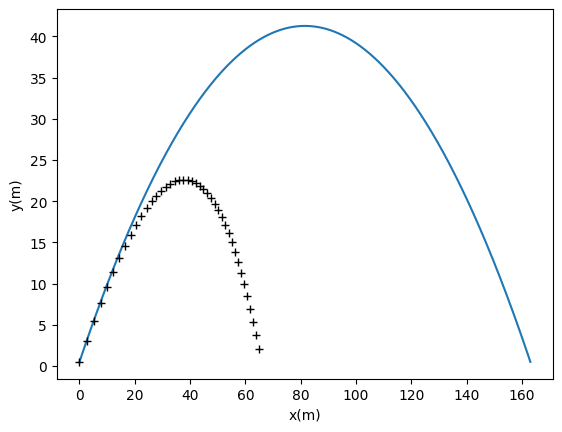

In [52]:
#Código hecho por: Joel Alejandro García Paredes
import numpy as np
import matplotlib.pyplot as plt
import math
g=9.81 #gravedad en m/s2
Cd=0.35 #Coeficiente de arrastre
rho=1.225 #densidad del aire en kg/m3
m=0.145 #masa de la pelota de beisbol en kg
R=7.4/200 #radio de la pelota en m
A=2*math.pi*R**2
#se van a graficar 10 puntos
k=42
vx=np.zeros(k)
vy=np.zeros(k)
rx=np.zeros(k)
ry=np.zeros(k)
n=len(vx)

def magnitud(x,y):
  return math.sqrt(x**2+y**2)

def Fax(vx,vy):
  return -0.5*Cd*A*rho*magnitud(vx,vy)*vx

def Fay(vx,vy):
  return -0.5*Cd*A*rho*magnitud(vx,vy)*vy

def ax(vx,vy):
  return 1/m*Fax(vx,vy)

def ay(vx,vy):
  return 1/m*Fay(vx,vy)-g

v=40 #velocidad en m/s
angulo=45 #angulo en grados
vxi=v*math.cos(math.radians(angulo))
vyi=v*math.sin(math.radians(angulo))
rxi=0
ryi=0.5
t=0.1
vx[0]=vxi
vy[0]=vyi
rx[0]=rxi
ry[0]=ryi
for i in range(1,n):
  vxi=vxi+ax(vxi,vyi)*t
  vyi=vyi+ay(vxi,vyi)*t
  rxi=rxi+vxi*t
  ryi=ryi+vyi*t
  vx[i]=vxi
  vy[i]=vyi
  rx[i]=rxi
  if ryi>=0:
   ry[i]=ryi
  else:
   break

rxi=0
ryi=0.5
def x(t):
  return rxi+vxi*t

def y(x):
  return ryi+math.tan(math.radians(angulo))*(x-rxi)-g*(x-rxi)**2/(2*vxi**2)

def tv(vx,vy):
  return 2*magnitud(vx,vy)/g*math.sin(math.radians(angulo))

vxi=v*math.cos(math.radians(angulo))
vyi=v*math.sin(math.radians(angulo))

tvuelo=tv(vxi,vyi)
xi=np.arange(0,x(tvuelo),0.01)
yi=y(xi)
plt.plot(xi,yi) #grafica del movimiento sin resistencia de aire

for i in range(n):
 plt.plot(rx[i],ry[i],'+',color='black') #grafica de los puntos

plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.show()